In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
#from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
GB = GradientBoostingRegressor()

In [6]:
GB.fit(X,y)

GradientBoostingRegressor()

In [7]:
GB.score(X,y)

0.9637686312178009

In [8]:
explainer = shap.TreeExplainer(GB)

In [9]:
shap_values = explainer.shap_values(X)

In [10]:
len(shap_values)

2580

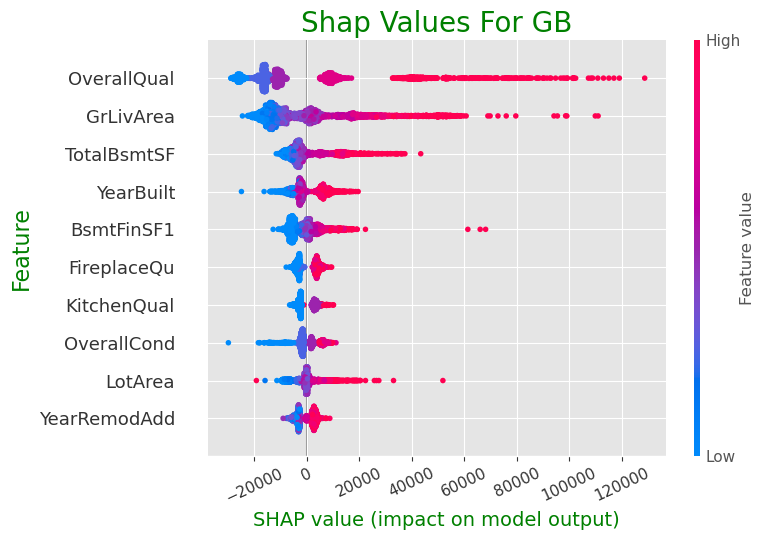

In [11]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X, show=False, max_display=10)
plt.title('Shap Values For GB', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('SHAP value (impact on model output)', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

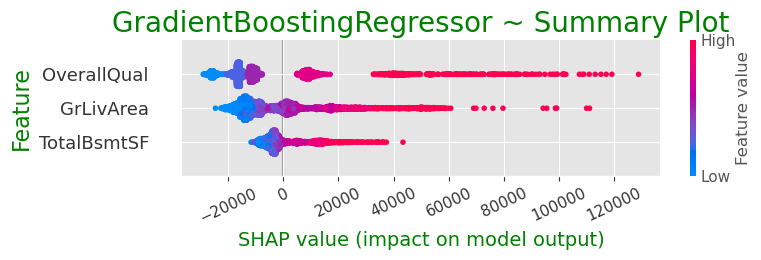

In [12]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X, show=False, max_display=3)
plt.title('GradientBoostingRegressor ~ Summary Plot', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('SHAP value (impact on model output)', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

In [14]:
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [15]:
plain = sns.color_palette('muted')[6]

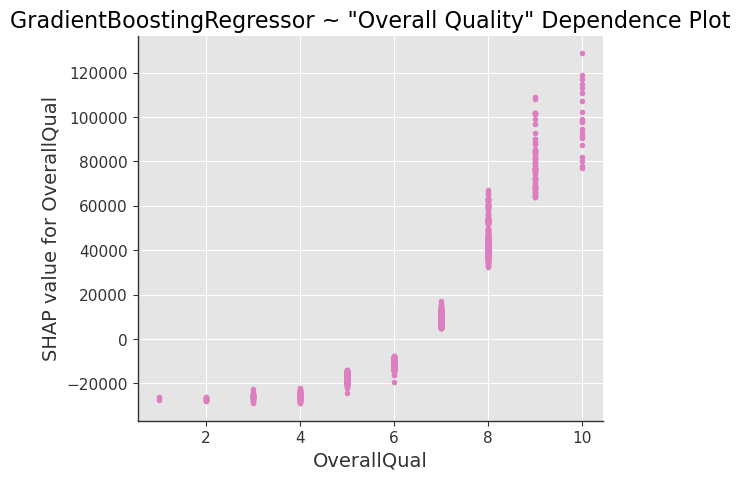

In [17]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("OverallQual", shap_values, X, interaction_index=None, color=plain, show=False)

plt.title('GradientBoostingRegressor ~ "Overall Quality" Dependence Plot', fontsize=16)

plt.ylabel('SHAP value for OverallQual', fontsize=14)
plt.xlabel('OverallQual', fontsize=14);


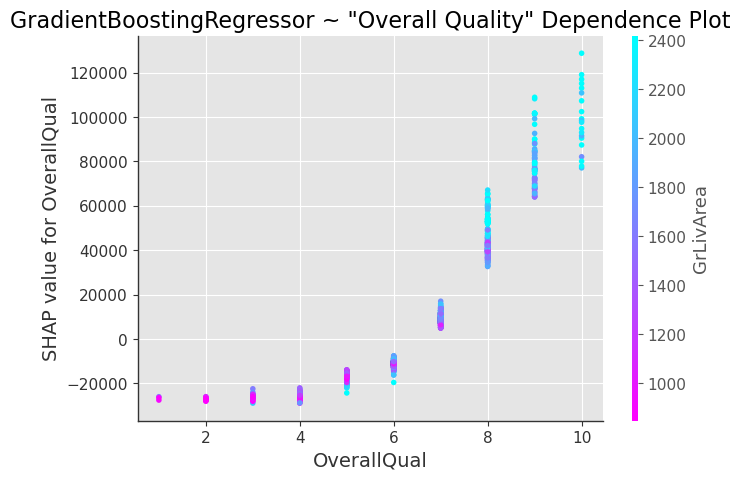

In [18]:
#Shap Dependence Plot vs "Overall Qual"
shap.dependence_plot("OverallQual", shap_values, X, cmap=plt.get_cmap("cool_r"), show=False)

plt.title('GradientBoostingRegressor ~ "Overall Quality" Dependence Plot', fontsize=16)

plt.ylabel('SHAP value for OverallQual', fontsize=14)
plt.xlabel('OverallQual', fontsize=14);

#fig, ax = plt.gcf(), plt.gca()
#fig.axes[-1].set_ylabel('1stFlrSF', fontsize=14, color='red');


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


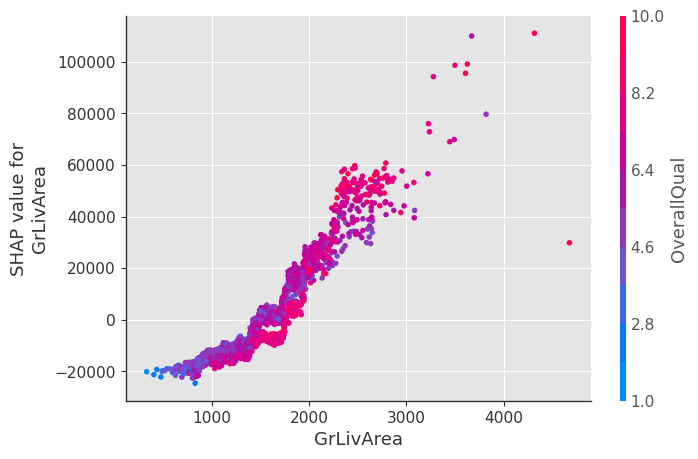

In [19]:
shap.dependence_plot("GrLivArea", shap_values, X)

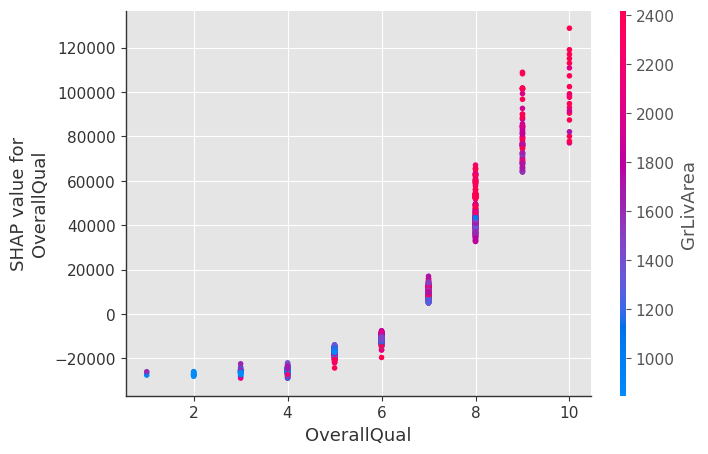

In [20]:
shap.dependence_plot("OverallQual", shap_values, X)